In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Literal
from numpy import array, ndarray, argsort, arange

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelBinarizer

from dslabs_functions import CLASS_EVAL_METRICS, DELTA_IMPROVE, plot_bar_chart, plot_multiline_chart, plot_evaluation_results, plot_horizontal_bar_chart, HEIGHT, plot_line_chart

import seaborn as sns

from matplotlib.pyplot import figure, savefig, show, subplots

import pandas as pd


In [ ]:
flight_df = pd.read_csv("Combined_Flights_2022.csv")
flight_df.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",GJT,DEN,False,False,1133,1123.0,0.0,-10.0,...,1140.0,1220.0,8.0,1245,-17.0,0.0,-2.0,1200-1259,1,0
1,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",HRL,IAH,False,False,732,728.0,0.0,-4.0,...,744.0,839.0,9.0,849,-1.0,0.0,-1.0,0800-0859,2,0
2,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1529,1514.0,0.0,-15.0,...,1535.0,1622.0,14.0,1639,-3.0,0.0,-1.0,1600-1659,2,0
3,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",IAH,GPT,False,False,1435,1430.0,0.0,-5.0,...,1446.0,1543.0,4.0,1605,-18.0,0.0,-2.0,1600-1659,2,0
4,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1135,1135.0,0.0,0.0,...,1154.0,1243.0,8.0,1245,6.0,0.0,0.0,1200-1259,2,0


In [ ]:
flight_target = flight_df["Cancelled"]
flight_features = flight_df.drop(columns=["Cancelled"])

flight_features = flight_features.dropna(axis=1, how="all") #drops all cols with all NaN

flight_features = flight_features.dropna(axis=1, how="any") #drops all cols with any NaN

flight_target = flight_target.loc[flight_features.index]

flight_features = flight_features.select_dtypes(include=["number"])

print("Final target distribution:")
print(flight_target.value_counts(dropna=False))

Final target distribution:
Cancelled
False    3955126
True      123192
Name: count, dtype: int64


In [ ]:
sample_size = 200000  # smaller because data set is huge, models take too long

flight_features_sampled = flight_features.sample(n=sample_size, random_state=42)
flight_target_sampled = flight_target.loc[flight_features_sampled.index]

print("\nSampled features shape:", flight_features_sampled.shape)
print("Sampled target distribution:")
print(flight_target_sampled.value_counts(dropna=False))

flight_features_train, flight_features_test, flight_target_train, flight_target_test = train_test_split(
    flight_features_sampled,
    flight_target_sampled,
    test_size=0.3,
    random_state=42,
    stratify=flight_target_sampled
)


Sampled features shape: (200000, 25)
Sampled target distribution:
Cancelled
False    194064
True       5936
Name: count, dtype: int64


**NAIVE BAYES ANALYSIS - FLIGHT DATA**

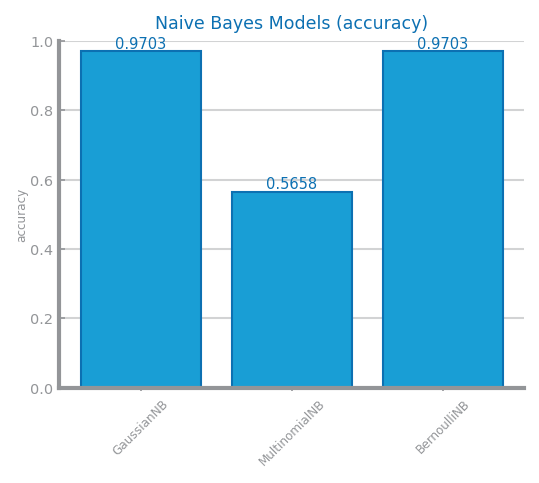

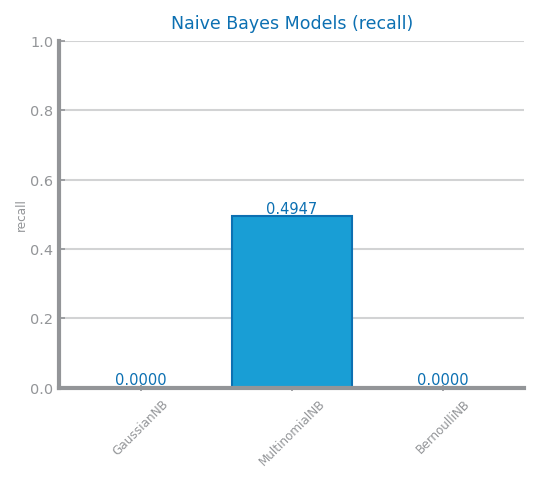

In [ ]:
flight_target_train_bin = flight_target_train.astype(int)
flight_target_test_bin = flight_target_test.astype(int)

file_tag = "flights"
eval_metric = "accuracy"

figure()
flight_nb_best_model_acc, flight_nb_params_acc = naive_Bayes_study(
    flight_features_train,
    flight_target_train_bin,
    flight_features_test,
    flight_target_test_bin,
    metric=eval_metric
)
savefig(f"{file_tag}_nb_{eval_metric}_study.png")
show()

figure()
flight_nb_best_model_rec, flight_nb_params_rec = naive_Bayes_study(
    flight_features_train,
    flight_target_train_bin,
    flight_features_test,
    flight_target_test_bin,
    metric="recall"
)
savefig(f"{file_tag}_nb_recall_study.png")
show()

<Figure size 600x450 with 0 Axes>

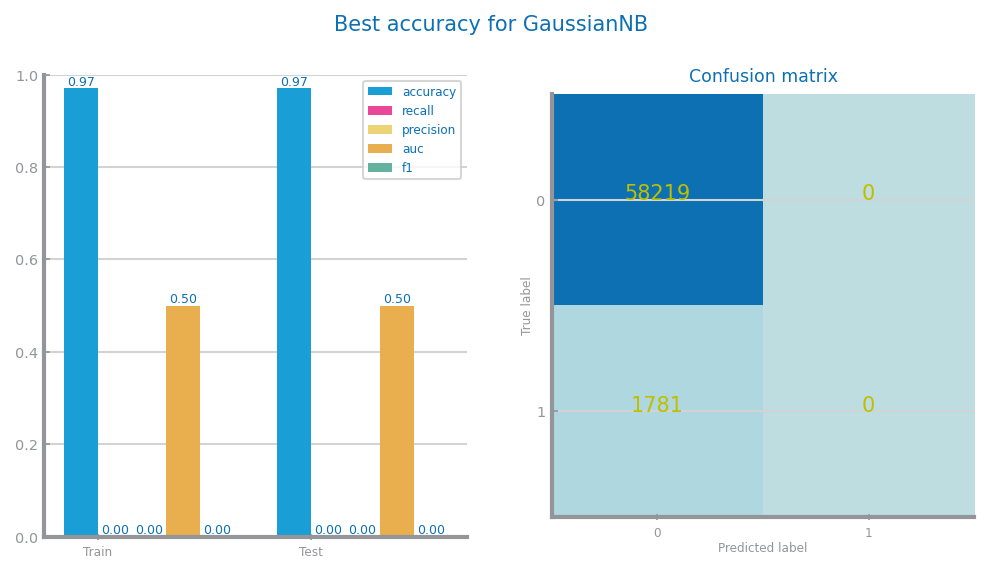

In [ ]:
prd_trn_nb_f = flight_nb_best_model_acc.predict(flight_features_train)
prd_tst_nb_f = flight_nb_best_model_acc.predict(flight_features_test)

nb_labels_f = sorted(np.unique(flight_target_train_bin))

figure()
plot_evaluation_results(
    flight_nb_params_acc,
    array(flight_target_train_bin),
    array(prd_trn_nb_f),
    array(flight_target_test_bin),
    array(prd_tst_nb_f),
    nb_labels_f
)
savefig(f'{file_tag}_{flight_nb_params_acc["name"]}_best_{flight_nb_params_acc["metric"]}_eval.png')
show()

**LOGISTIC REGRESSION ANALYSIS - FLIGHT DATA**

/Users/gargoyle/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/gargoyle/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/gargoyle/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/gargoyle/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/gargoyle/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/gargoyle/Library/Python/3.9/lib/python/site-pack

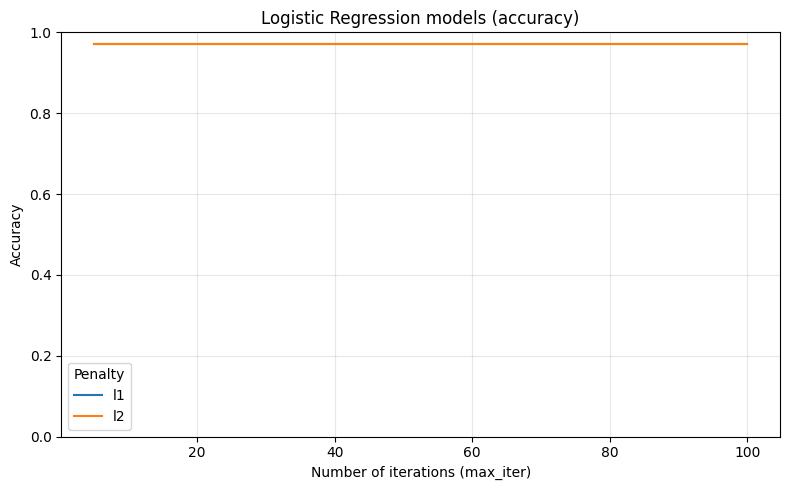


===== Final metrics per penalty (best model for each) =====

Penalty = L1 (best max_iter=5)
Accuracy: 0.9704
Recall: 0.9704
Precision: 0.9713
F1: 0.9559

Penalty = L2 (best max_iter=5)
Accuracy: 0.9703
Recall: 0.9703
Precision: 0.9415
F1: 0.9557


In [ ]:
lr_flight_best_models, lr_flight_final_metrics = logistic_regression_study(
    flight_features_train,
    flight_target_train,
    flight_features_test,
    flight_target_test,
    nr_max_iterations=100,
    lag=5
)

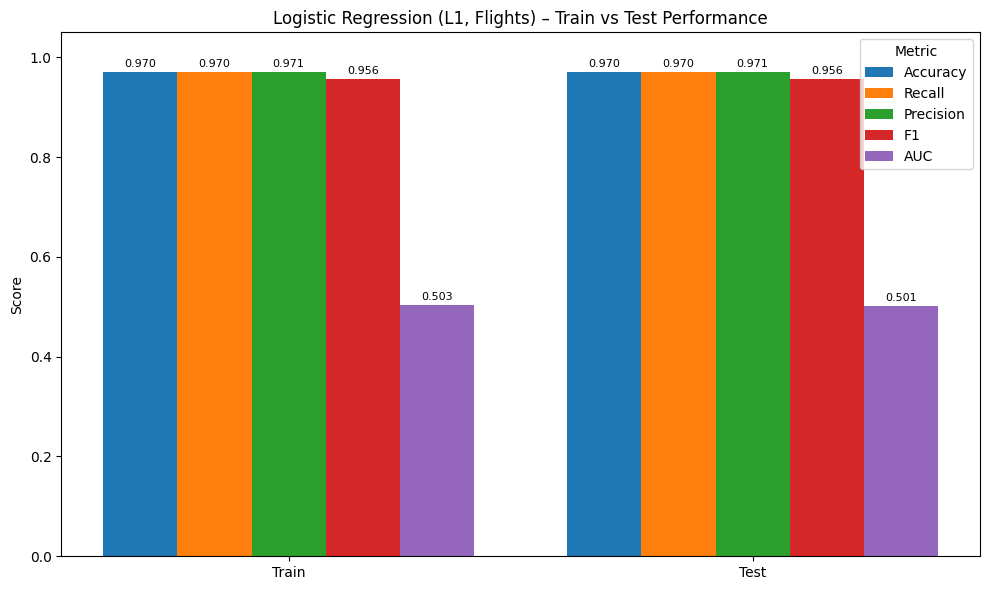

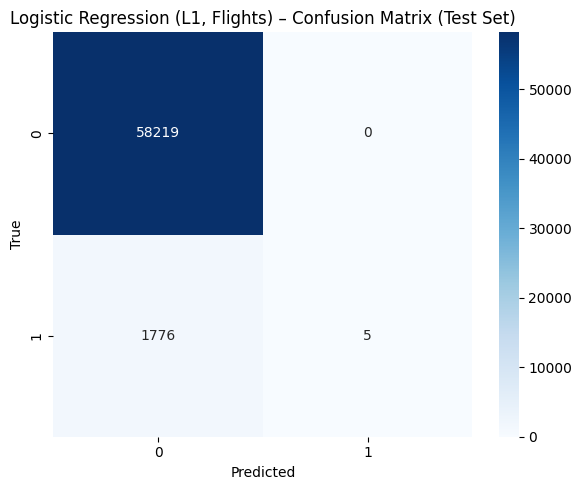

In [ ]:
best_lr_flight = lr_flight_best_models["l1"]

pred_train_lr_flight = best_lr_flight.predict(flight_features_train)
pred_test_lr_flight = best_lr_flight.predict(flight_features_test)

lb_lr_flight = LabelBinarizer()
y_train_bin_lr_flight = lb_lr_flight.fit_transform(flight_target_train).ravel()
y_test_bin_lr_flight = lb_lr_flight.transform(flight_target_test).ravel()
pred_train_bin_lr_flight = lb_lr_flight.transform(pred_train_lr_flight).ravel()
pred_test_bin_lr_flight = lb_lr_flight.transform(pred_test_lr_flight).ravel()

lr_flight_train_metrics = {
    "Accuracy": accuracy_score(flight_target_train, pred_train_lr_flight),
    "Recall": recall_score(flight_target_train, pred_train_lr_flight, average="weighted", zero_division=0),
    "Precision": precision_score(flight_target_train, pred_train_lr_flight, average="weighted", zero_division=0),
    "F1": f1_score(flight_target_train, pred_train_lr_flight, average="weighted", zero_division=0),
    "AUC": roc_auc_score(y_train_bin_lr_flight, pred_train_bin_lr_flight),
}

lr_flight_test_metrics = {
    "Accuracy": accuracy_score(flight_target_test, pred_test_lr_flight),
    "Recall": recall_score(flight_target_test, pred_test_lr_flight, average="weighted", zero_division=0),
    "Precision": precision_score(flight_target_test, pred_test_lr_flight, average="weighted", zero_division=0),
    "F1": f1_score(flight_target_test, pred_test_lr_flight, average="weighted", zero_division=0),
    "AUC": roc_auc_score(y_test_bin_lr_flight, pred_test_bin_lr_flight),
}

lr_flight_train_metrics, lr_flight_test_metrics

metrics = list(lr_flight_train_metrics.keys())
train_vals = [lr_flight_train_metrics[m] for m in metrics]
test_vals  = [lr_flight_test_metrics[m] for m in metrics]

groups = np.array([0, 1])
group_labels = ["Train", "Test"]

n_metrics = len(metrics)
group_width = 0.8
bar_width = group_width / n_metrics

colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"][:n_metrics]

plt.figure(figsize=(10, 6))
for i, metric in enumerate(metrics):
    positions = groups - group_width/2 + (i + 0.5) * bar_width
    plt.bar(positions,
            [train_vals[i], test_vals[i]],
            width=bar_width,
            label=metric,
            color=colors[i])
    for x, val in zip(positions, [train_vals[i], test_vals[i]]):
        plt.text(x, val + 0.01, f"{val:.3f}", ha="center", fontsize=8)

plt.xticks(groups, group_labels)
plt.ylim(0, 1.05)
plt.ylabel("Score")
plt.title("Logistic Regression (L1, Flights) – Train vs Test Performance")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()


cm_lr_flight = confusion_matrix(flight_target_test, pred_test_lr_flight)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr_flight, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression (L1, Flights) – Confusion Matrix (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()
